In [104]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [105]:
col_names = ['No.','Time','Source IP', 'Src Port', 'Dest IP','Dest Port', 'Length', 'Info', 'Protocol', 'Label', 'Burst', "Throughput"]
network_overview = pd.read_csv("network_overview1.csv",  names=col_names , skiprows=[0])
network_overview = network_overview.dropna()

In [106]:
print(network_overview)

         No.       Time       Source IP Src Port         Dest IP Dest Port  \
1          1   0.000000  172.20.110.130    30002  192.168.128.88     50520   
2          2   0.052420  192.168.128.88    50520  172.20.110.130     30002   
3          3   0.102234  172.20.110.130    30002  192.168.128.88     50520   
7          7   0.152783  192.168.128.88    50520  172.20.110.130     30002   
8          8   0.202839  172.20.110.130    30002  192.168.128.88     50520   
...      ...        ...             ...      ...             ...       ...   
54668  54668  45.063267  192.168.128.88    50520  172.20.110.130     30002   
54669  54669  45.117533  172.20.110.130    30002  192.168.128.88     50520   
54670  54670  45.163436  192.168.128.88    50520  172.20.110.130     30002   
54671  54671  45.220454  172.20.110.130    30002  192.168.128.88     50520   
54672  54672  45.263606  192.168.128.88    50520  172.20.110.130     30002   

       Length                                               Inf

In [85]:
X = network_overview[['Throughput', 'Burst']].astype(float)
y = network_overview['Label']



['Throughput', 'Burst']
['1', '2', '3']


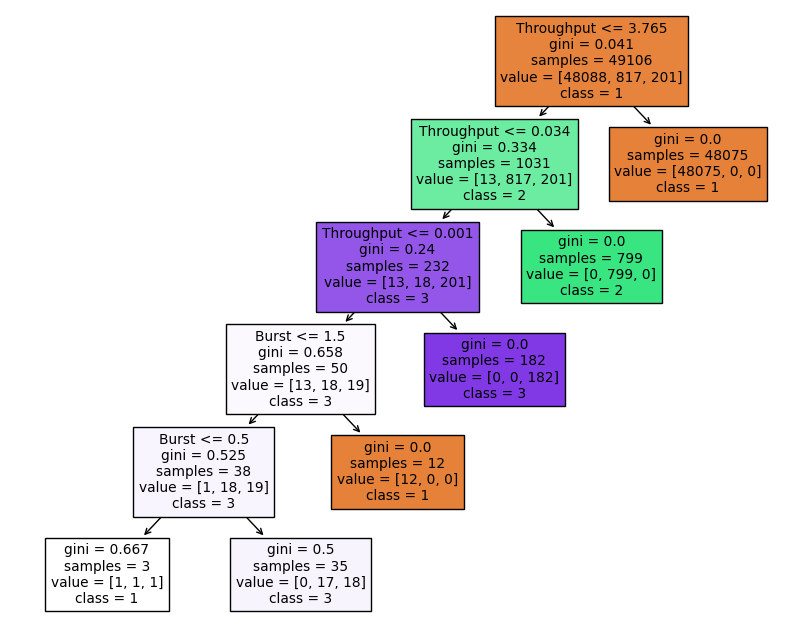

[Text(0.75, 0.9166666666666666, 'Throughput <= 3.765\ngini = 0.041\nsamples = 49106\nvalue = [48088, 817, 201]\nclass = 1'),
 Text(0.625, 0.75, 'Throughput <= 0.034\ngini = 0.334\nsamples = 1031\nvalue = [13, 817, 201]\nclass = 2'),
 Text(0.5, 0.5833333333333334, 'Throughput <= 0.001\ngini = 0.24\nsamples = 232\nvalue = [13, 18, 201]\nclass = 3'),
 Text(0.375, 0.4166666666666667, 'Burst <= 1.5\ngini = 0.658\nsamples = 50\nvalue = [13, 18, 19]\nclass = 3'),
 Text(0.25, 0.25, 'Burst <= 0.5\ngini = 0.525\nsamples = 38\nvalue = [1, 18, 19]\nclass = 3'),
 Text(0.125, 0.08333333333333333, 'gini = 0.667\nsamples = 3\nvalue = [1, 1, 1]\nclass = 1'),
 Text(0.375, 0.08333333333333333, 'gini = 0.5\nsamples = 35\nvalue = [0, 17, 18]\nclass = 3'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0]\nclass = 1'),
 Text(0.625, 0.4166666666666667, 'gini = 0.0\nsamples = 182\nvalue = [0, 0, 182]\nclass = 3'),
 Text(0.75, 0.5833333333333334, 'gini = 0.0\nsamples = 799\nvalue = [0, 799, 0]\ncl

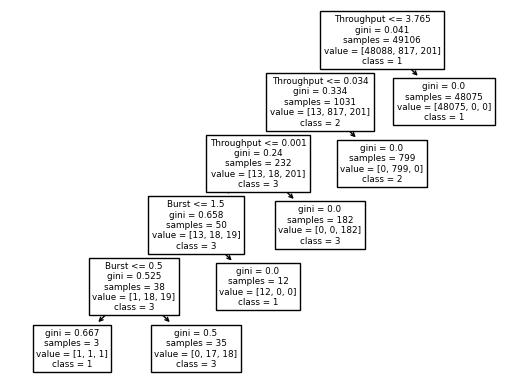

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

feature_names = X.columns.tolist()
class_names = y.unique().tolist()
class_names = sorted([str(int(c)) for c in class_names])
print(feature_names)
print(class_names)

plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()
tree.plot_tree(clf, feature_names=feature_names,  
                   class_names=class_names)

In [108]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.9996130819044516
Accuracy Score on test data:  0.9996334982591167


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5349
           2       1.00      0.98      0.99        85
           3       0.92      1.00      0.96        23

    accuracy                           1.00      5457
   macro avg       0.97      0.99      0.98      5457
weighted avg       1.00      1.00      1.00      5457

[[5349    0    0]
 [   0   83    2]
 [   0    0   23]]


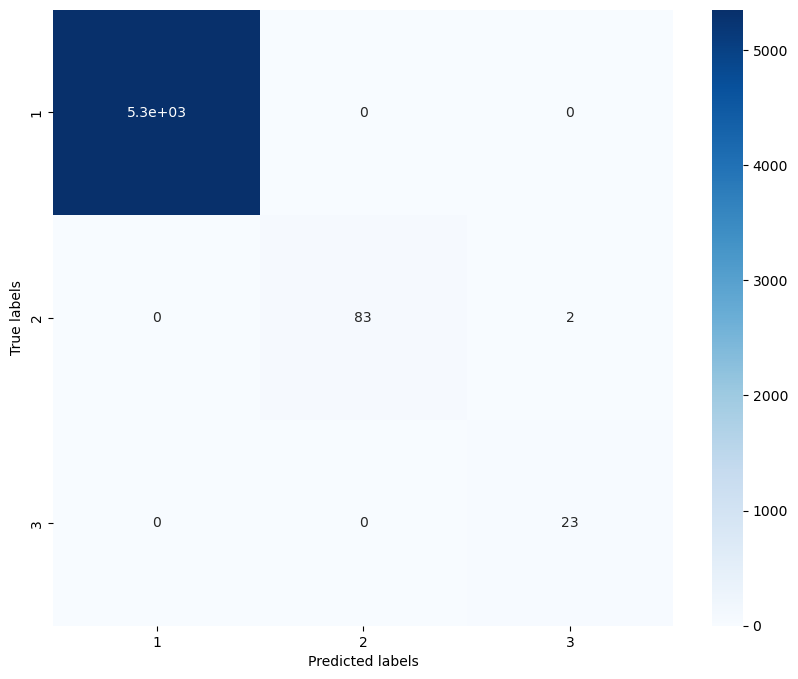

In [109]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# create the decision tree classifier
dtc = DecisionTreeClassifier()

# create the GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score:  0.999470536863574


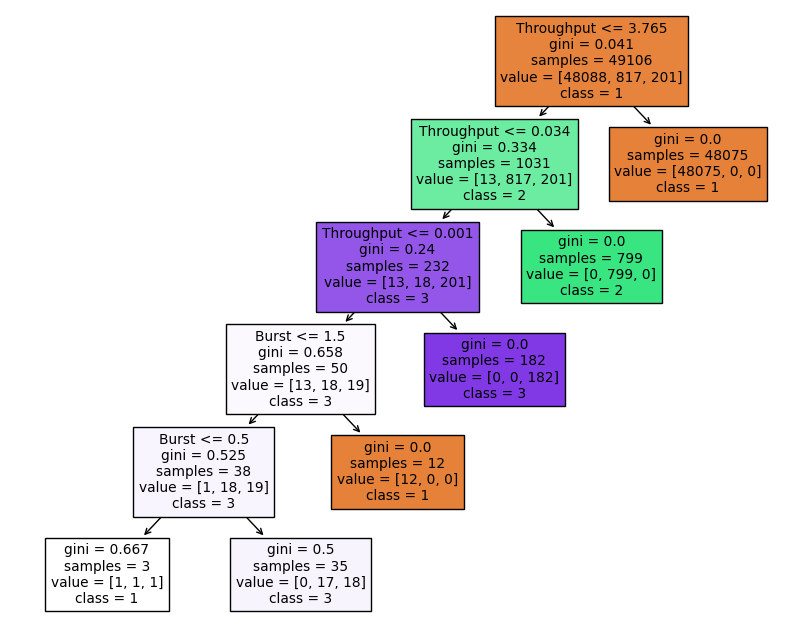

In [115]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=3, min_samples_split=2)
model.fit(X_train, y_train)

# plot the decision tree
plt.figure(figsize=(10,8))
plot_tree(model, feature_names=feature_names, class_names= class_names, filled=True)
plt.show()

C:\Users\ljd\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1,4,6) have mixed types.Specify dtype option on import or set low_memory=False.


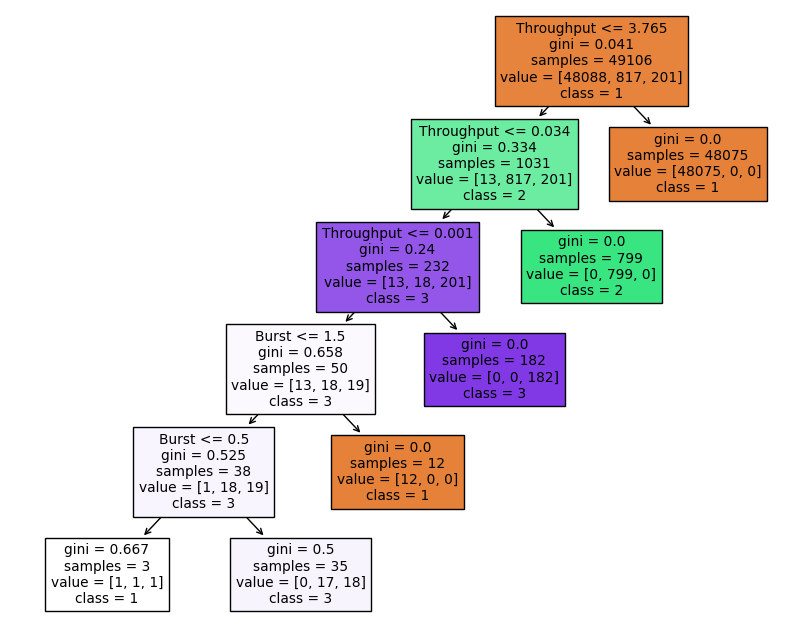

0.00029077330394992575
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5349
           2       1.00      0.98      0.99        85
           3       0.92      1.00      0.96        23

    accuracy                           1.00      5457
   macro avg       0.97      0.99      0.98      5457
weighted avg       1.00      1.00      1.00      5457

[[5349    0    0]
 [   0   83    2]
 [   0    0   23]]


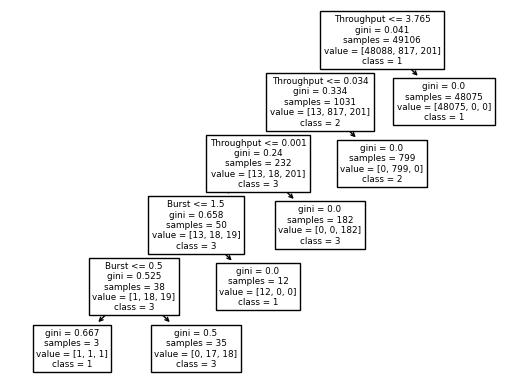

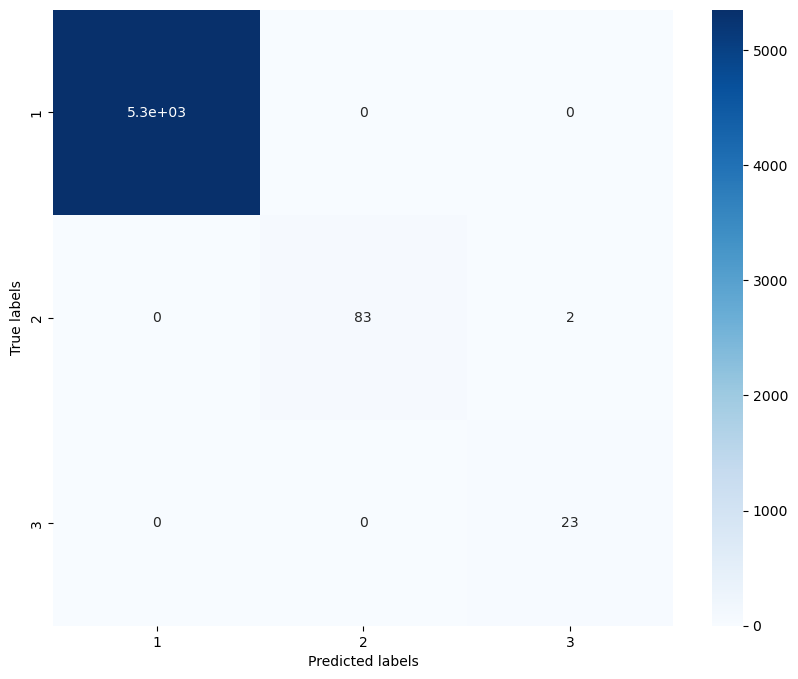

In [116]:
col_names = ['No.','Time','Source IP', 'Src Port', 'Dest IP','Dest Port', 'Length', 'Info', 'Protocol', 'Label', 'Burst', "Throughput"]
new_network_overview = pd.read_csv("network_overview2.csv",  names=col_names , skiprows=[0])
new_network_overview = new_network_overview.dropna()

X_new = new_network_overview[['Throughput', 'Burst']].astype(float)
y_new = new_network_overview['Label']

y_pred_new = clf.predict(X_new)

feature_names = X_new.columns.tolist()
class_names = y_new.unique().tolist()
class_names = sorted([str(int(c)) for c in class_names])

df = pd.DataFrame({'True Label': y_new, 'Predicted Label': y_pred_new})
#df.to_csv("new.csv")

plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()


accuracy_new = accuracy_score(y_true=y_new, y_pred=y_pred_new)
print(accuracy_new)
tree.plot_tree(clf, feature_names=feature_names,  
                   class_names=class_names)

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

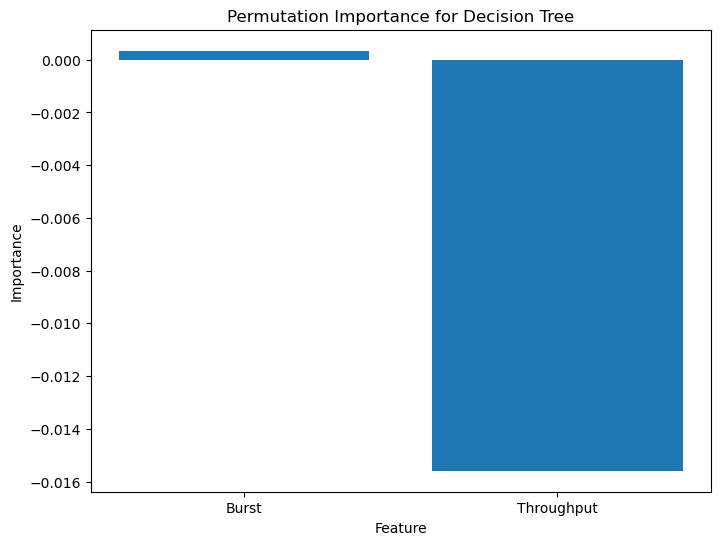

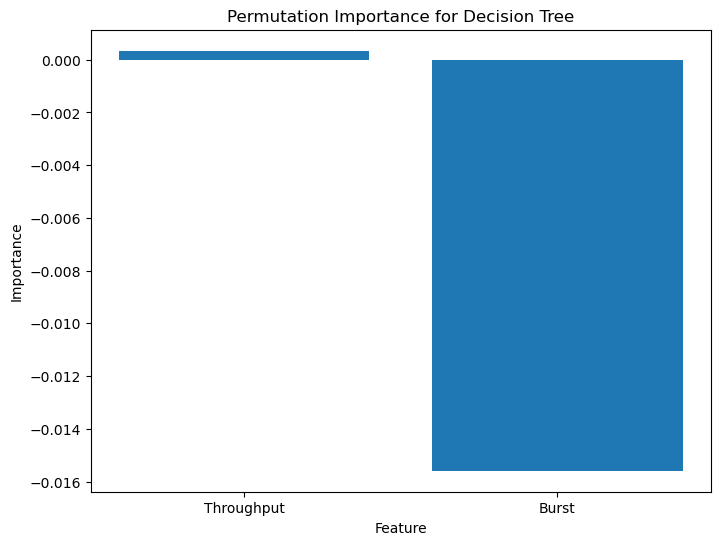

In [90]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_new = encoder.fit_transform(y) - 1

result = permutation_importance(clf, X, y, n_repeats=10, random_state=42)

# create dataframe to store results and sort by importance
importance_df = pd.DataFrame({'feature': X.columns.tolist(), 'importance': result.importances_mean})
importance_df.sort_values('importance', ascending=False, inplace=True)

# plot feature importances
plt.figure(figsize=(8,6))
plt.bar(importance_df['feature'], importance_df['importance'])
plt.title('Permutation Importance for Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# plot feature importances for 'Throughput' and 'Burst' separately
plt.figure(figsize=(8,6))
plt.bar(['Throughput', 'Burst'], importance_df['importance'][:2])
plt.title('Permutation Importance for Decision Tree')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# assume X and y are already defined

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rf.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9989920278566847


In [53]:
y_pred = rf.predict(X_new)
accuracy = accuracy_score(y_new, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9992041993786633


## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the model with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

col_names = ['No.','Time','Source IP', 'Src Port', 'Dest IP','Dest Port', 'Length', 'Info', 'Protocol', 'Label', 'Burst', "Throughput"]
network_overview = pd.read_csv("network_overview1.csv",  names=col_names , skiprows=[0])
network_overview = network_overview.dropna()

# Load the dataset
X = network_overview[['Throughput', 'Burst']].astype(float)
y = network_overview['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier with k=5
clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9989920278566847
Confusion Matrix:
[[10683     1     0]
 [    0   177     0]
 [    0    10    42]]


Accuracy for KNN 0.00029077330394992575

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5349
           2       1.00      0.98      0.99        85
           3       0.92      1.00      0.96        23

    accuracy                           1.00      5457
   macro avg       0.97      0.99      0.98      5457
weighted avg       1.00      1.00      1.00      5457

Confusion Matrixc:


C:\Users\ljd\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1,4,6) have mixed types.Specify dtype option on import or set low_memory=False.


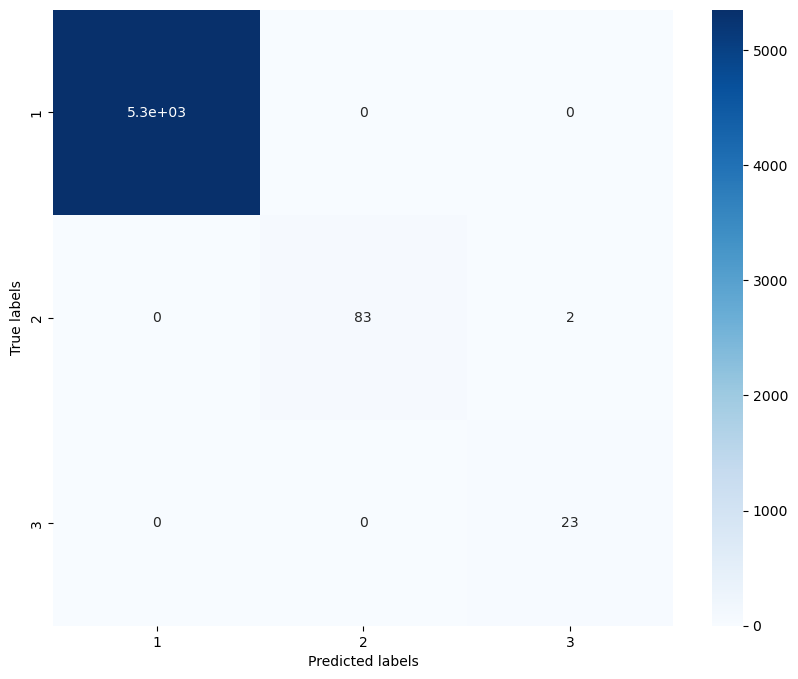

In [117]:
col_names = ['No.','Time','Source IP', 'Src Port', 'Dest IP','Dest Port', 'Length', 'Info', 'Protocol', 'Label', 'Burst', "Throughput"]
new_network_overview = pd.read_csv("network_overview2.csv",  names=col_names , skiprows=[0])
new_network_overview = new_network_overview.dropna()

X_new = new_network_overview[['Throughput', 'Burst']].astype(float)
y_new = new_network_overview['Label']

y_pred_new = clf.predict(X_new)


accuracy_new = accuracy_score(y_true=y_new, y_pred=y_pred_new)
print("Accuracy for KNN", accuracy_new)
print()

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrixc:")
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
params = {'n_neighbors': [3, 5, 7, 9, 11],
          'weights': ['uniform', 'distance'],
          'p': [1, 2]}

# Create the GridSearchCV object
grid = GridSearchCV(knn, params, cv=5)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best parameters: ", grid.best_params_)

# Use the best model to make predictions on the test data
y_pred = grid.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


Best parameters:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10684
           2       0.94      1.00      0.97       177
           3       1.00      0.81      0.89        52

    accuracy                           1.00     10913
   macro avg       0.98      0.94      0.95     10913
weighted avg       1.00      1.00      1.00     10913



In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

col_names = ['No.','Time','Source IP', 'Src Port', 'Dest IP','Dest Port', 'Length', 'Info', 'Protocol', 'Label', 'Burst', "Throughput"]
network_overview = pd.read_csv("network_overview1.csv",  names=col_names , skiprows=[0])
network_overview = network_overview.dropna()

# Load the dataset
X = network_overview[['Throughput', 'Burst']].astype(float)
y = network_overview['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the hyperparameters for the KNN classifier
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters: ", grid_search.best_params_)

# Train the classifier on the training data with the best hyperparameters
clf = KNeighborsClassifier(**grid_search.best_params_)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred, target_names=class_names)
print(report)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Best parameters:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.9989920278566847
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     10684
           2       0.94      1.00      0.97       177
           3       1.00      0.81      0.89        52

    accuracy                           1.00     10913
   macro avg       0.98      0.94      0.95     10913
weighted avg       1.00      1.00      1.00     10913

Confusion Matrix:
[[10683     1     0]
 [    0   177     0]
 [    0    10    42]]
